In [6]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Compose, Normalize
from torch.utils.data import DataLoader

device = 'cuda'
transform = Compose([ToTensor(), Normalize((0.1307,), (0.3081,))])

datasets = {
    'train': MNIST(root='data', train=True, download=True, transform=transform),
    'test': MNIST(root='data', train=False, download=True, transform=transform)
}

In [7]:
from torch import Tensor
from torch.nn import Module
from torch.nn import Flatten,  Sequential
from torch.nn import Linear, ReLU, Dropout
from model.dropconnect import DropConnectLinear, DropConnectBatchAverage

class Perceptron(Module):
    def __init__(self, input_features: int, hidden_dimension: int, output_features: int, p: float):
        super().__init__()
        self.flatten = Flatten()
        self.layers = Sequential(
            Linear(input_features, hidden_dimension),
            ReLU(),
            Dropout(p),
            Linear(hidden_dimension, output_features),
        )

    def forward(self, input: Tensor) -> Tensor:
        input = self.flatten(input)
        return self.layers(input)
            

class DropConnectPerceptron(Module):
    def __init__(self, input_features: int, hidden_dimension: int, output_features: int, p: float):
        super().__init__()
        self.flatten = Flatten()
        self.layers = Sequential(
            DropConnectLinear(input_features, hidden_dimension, p=p, max_batch_size=256),
            ReLU(),
            DropConnectBatchAverage(),
            DropConnectLinear(hidden_dimension, output_features, p=p, max_batch_size=256),
            ReLU(),
            DropConnectBatchAverage()
        )

    def forward(self, input: Tensor) -> Tensor:
        input = self.flatten(input)
        return self.layers(input)

In [8]:
import torch
from torch.optim import SGD, Adam
from torch.nn import CrossEntropyLoss
torch.set_float32_matmul_precision('high')   

from uuid import uuid4
from utils import run
from metrics import Summary

In [9]:
loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=64,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=64,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

Running experiment Perceptron with id 2847a12f-03f2-4ffb-9d1b-108c930e91bc
Tensorboard logs are saved in logs/Perceptron-2847a12f-03f2-4ffb-9d1b-108c930e91bc
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
-------------------------------------------------------------

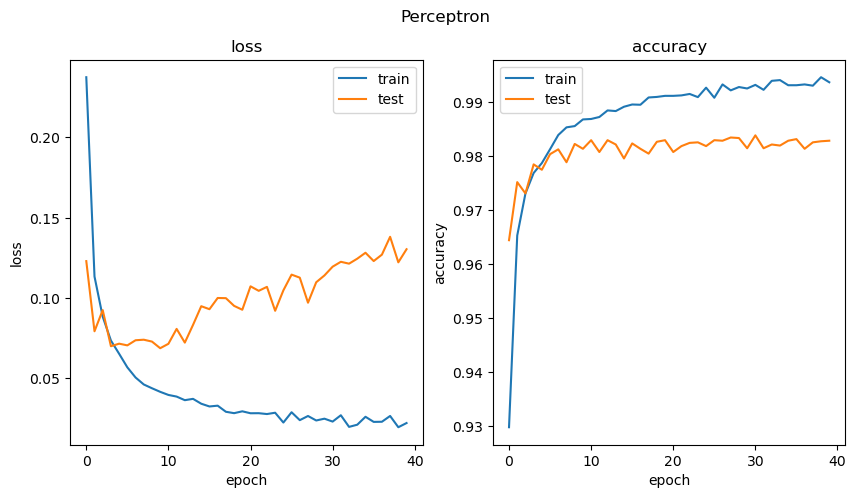

Running experiment DropConnectPerceptron with id 2847a12f-03f2-4ffb-9d1b-108c930e91bc
Tensorboard logs are saved in logs/DropConnectPerceptron-2847a12f-03f2-4ffb-9d1b-108c930e91bc
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.3, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.3, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    ep

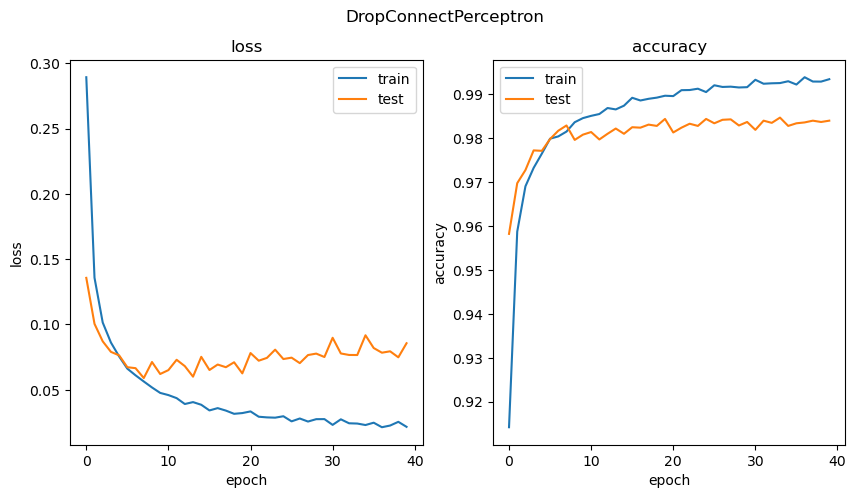

In [10]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.3).to(device)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

model = DropConnectPerceptron(784, 512, 10, p=0.3).to(device)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

Running experiment Perceptron with id 059ef2c0-ed06-4452-aeb6-6b5037e98740
Tensorboard logs are saved in logs/Perceptron-059ef2c0-ed06-4452-aeb6-6b5037e98740
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.4, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
-------------------------------------------------------------

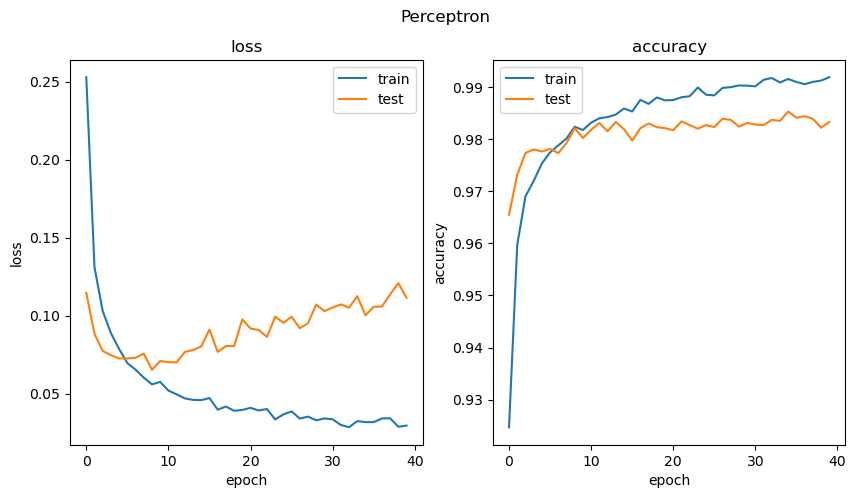

Running experiment DropConnectPerceptron with id 059ef2c0-ed06-4452-aeb6-6b5037e98740
Tensorboard logs are saved in logs/DropConnectPerceptron-059ef2c0-ed06-4452-aeb6-6b5037e98740
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.4, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.4, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    ep

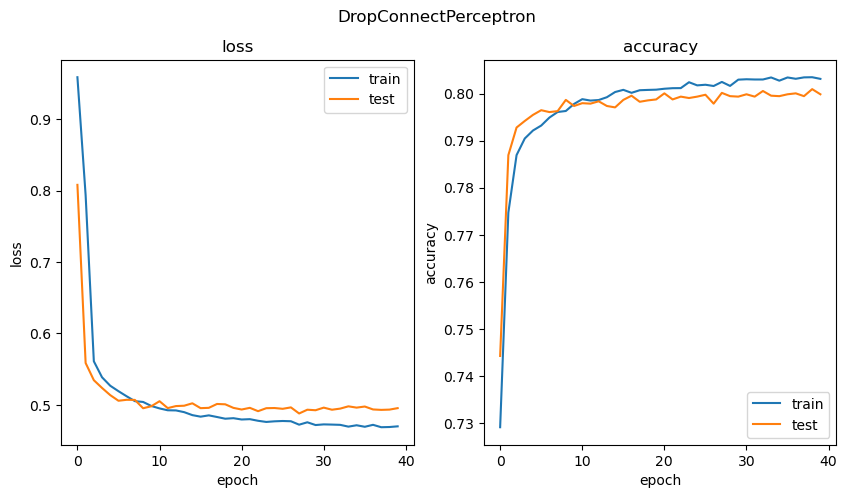

In [11]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

model = DropConnectPerceptron(784, 512, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

Running experiment Perceptron with id a6b74cb6-d1ca-4c6d-9e80-a01a34994b5a
Tensorboard logs are saved in logs/Perceptron-a6b74cb6-d1ca-4c6d-9e80-a01a34994b5a
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.4, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

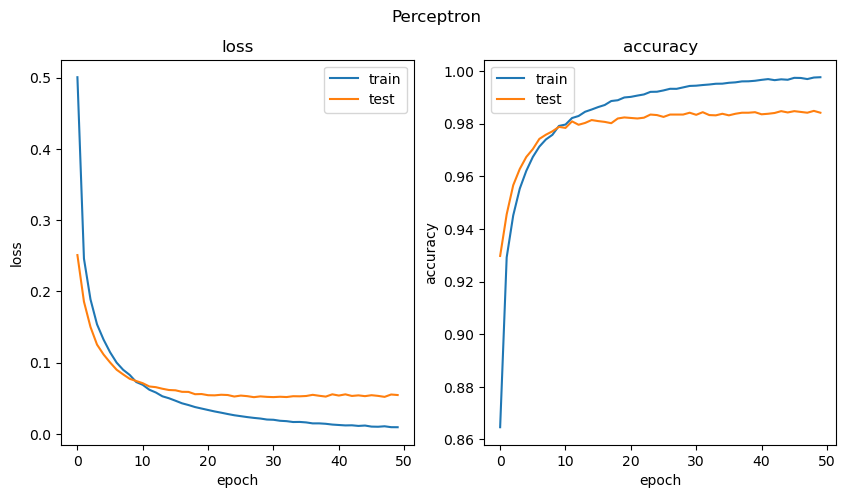

Running experiment DropConnectPerceptron with id a6b74cb6-d1ca-4c6d-9e80-a01a34994b5a
Tensorboard logs are saved in logs/DropConnectPerceptron-a6b74cb6-d1ca-4c6d-9e80-a01a34994b5a
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.4, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.4, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    ep

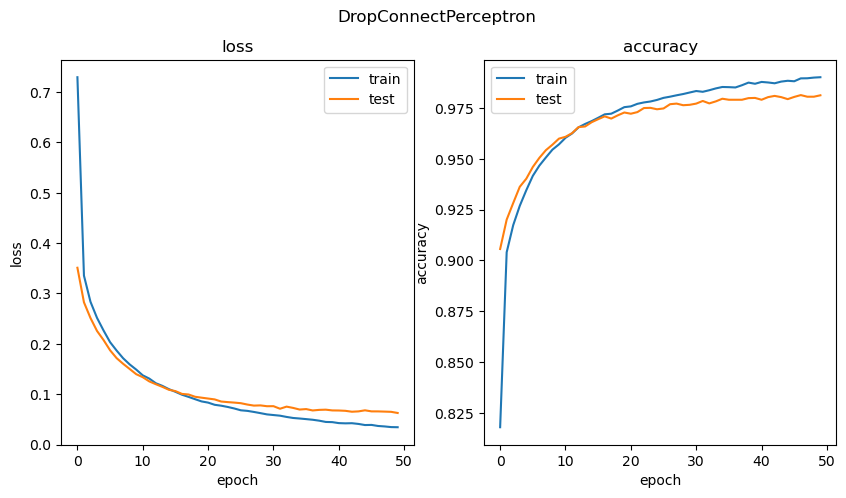

In [12]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id a8c0b82d-bfa8-41f0-871c-c6d5830615ed
Tensorboard logs are saved in logs/Perceptron-a8c0b82d-bfa8-41f0-871c-c6d5830615ed
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

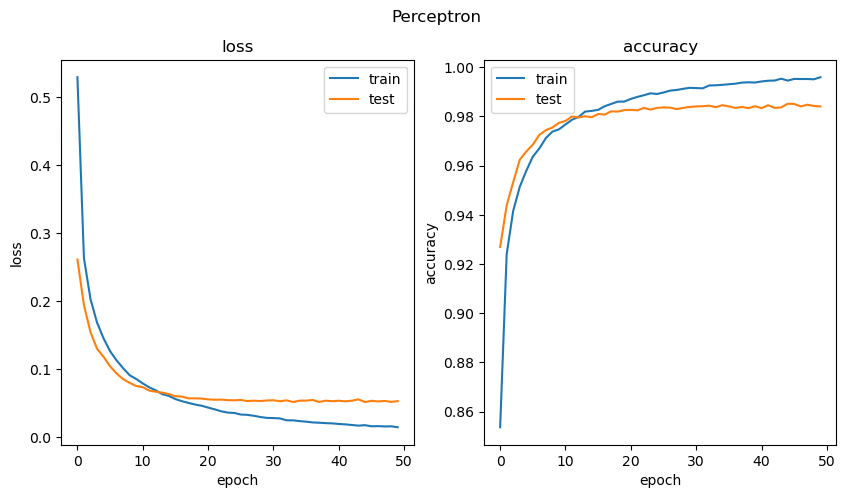

Running experiment DropConnectPerceptron with id a8c0b82d-bfa8-41f0-871c-c6d5830615ed
Tensorboard logs are saved in logs/DropConnectPerceptron-a8c0b82d-bfa8-41f0-871c-c6d5830615ed
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    ep

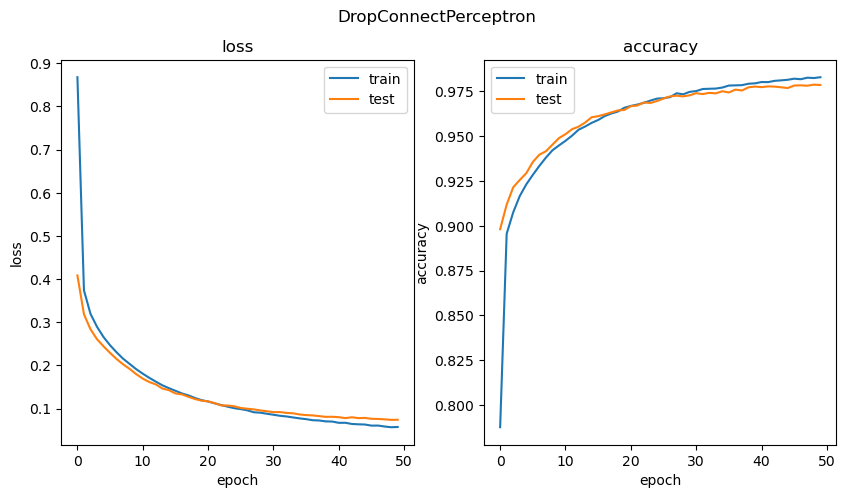

In [13]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment DropConnectPerceptron with id b97c3391-104d-4d8e-8304-5e06aa7546fd
Tensorboard logs are saved in logs/DropConnectPerceptron-b97c3391-104d-4d8e-8304-5e06aa7546fd
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    ep

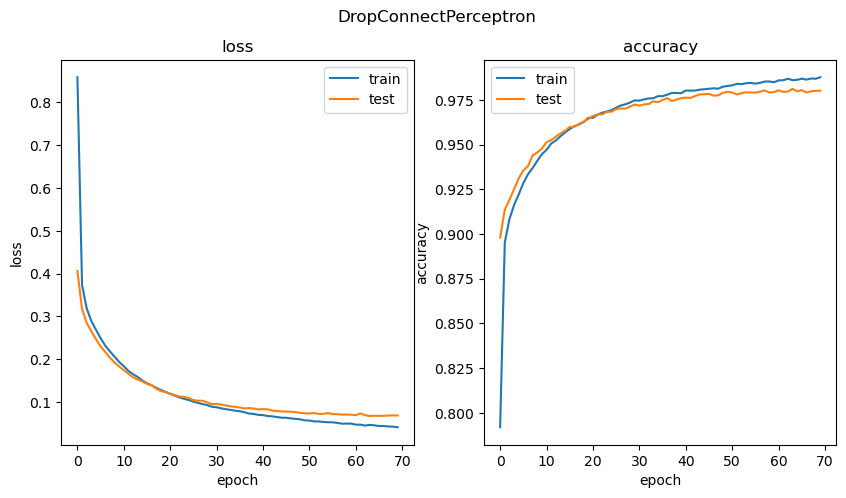

In [14]:
experiment = uuid4()
model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

Running experiment Perceptron with id b97c3391-104d-4d8e-8304-5e06aa7546fd
Tensorboard logs are saved in logs/Perceptron-b97c3391-104d-4d8e-8304-5e06aa7546fd
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

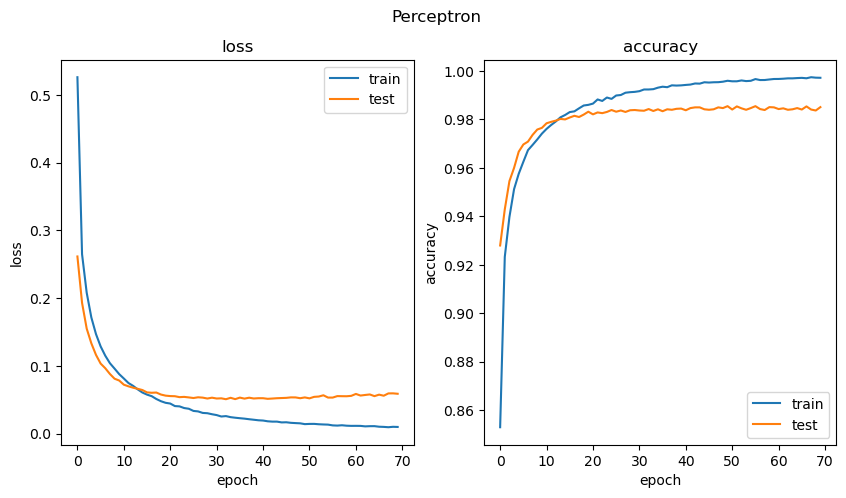

In [16]:
from uuid import UUID

experiment = UUID('b97c3391-104d-4d8e-8304-5e06aa7546fd')

model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

Running experiment Perceptron with id f2ec30b1-2f6b-4e0b-aed8-da43ed916c07
Tensorboard logs are saved in logs/Perceptron-f2ec30b1-2f6b-4e0b-aed8-da43ed916c07
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

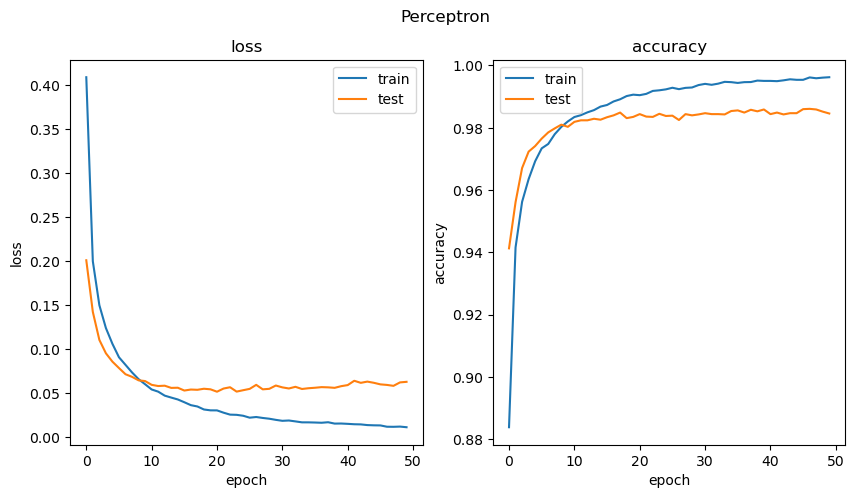

Running experiment DropConnectPerceptron with id f2ec30b1-2f6b-4e0b-aed8-da43ed916c07
Tensorboard logs are saved in logs/DropConnectPerceptron-f2ec30b1-2f6b-4e0b-aed8-da43ed916c07
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    ep

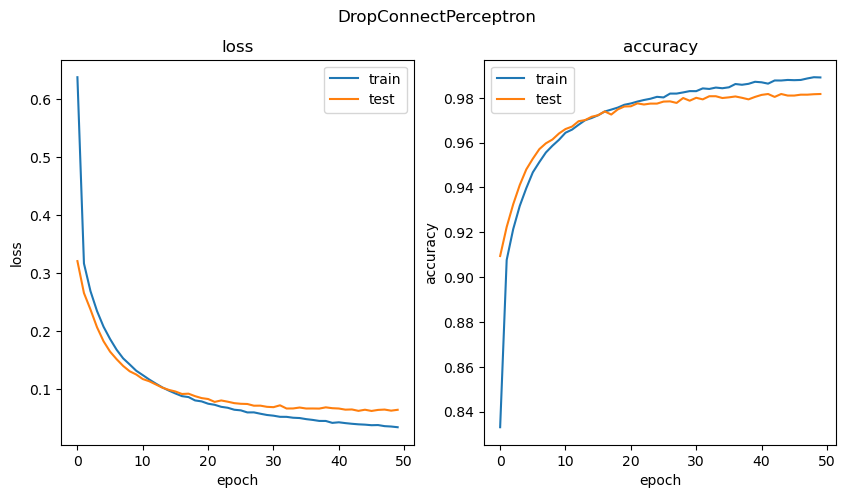

In [15]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id 521ae567-aaad-48a3-9619-785054318f37
Tensorboard logs are saved in logs/Perceptron-521ae567-aaad-48a3-9619-785054318f37
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=256, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=256, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

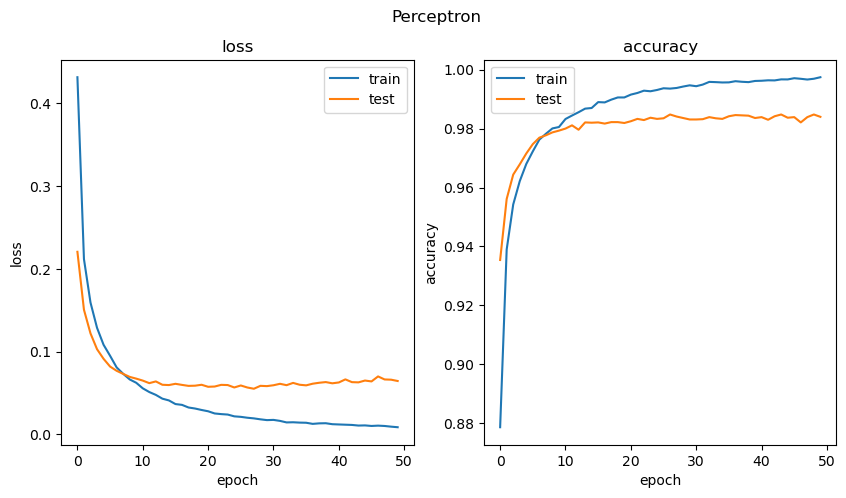

Running experiment DropConnectPerceptron with id 521ae567-aaad-48a3-9619-785054318f37
Tensorboard logs are saved in logs/DropConnectPerceptron-521ae567-aaad-48a3-9619-785054318f37
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=256, bias=True, p=0.3, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=256, out_features=10, bias=True, p=0.3, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    ep

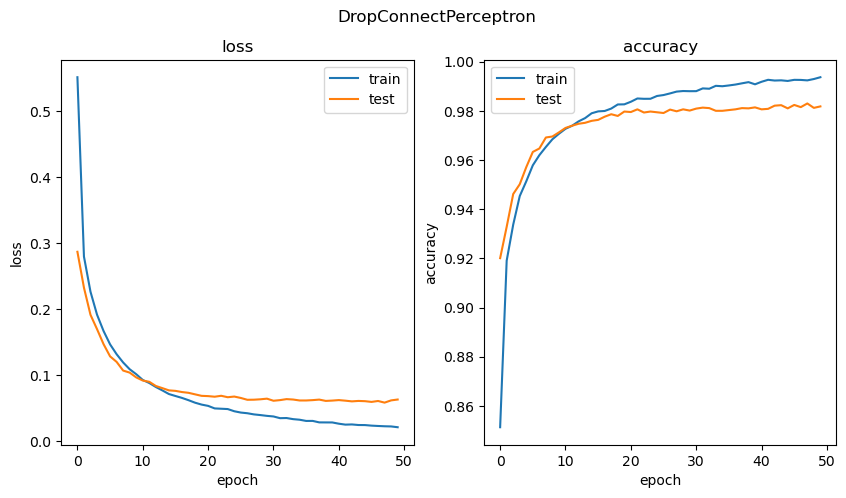

In [17]:
experiment = uuid4()
model = Perceptron(784, 256, 10, p=0.3).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 256, 10, p=0.3).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id d37ac7cc-baf3-4158-a15f-73e18e255718
Tensorboard logs are saved in logs/Perceptron-d37ac7cc-baf3-4158-a15f-73e18e255718
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=256, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.4, inplace=False)
      (3): Linear(in_features=256, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

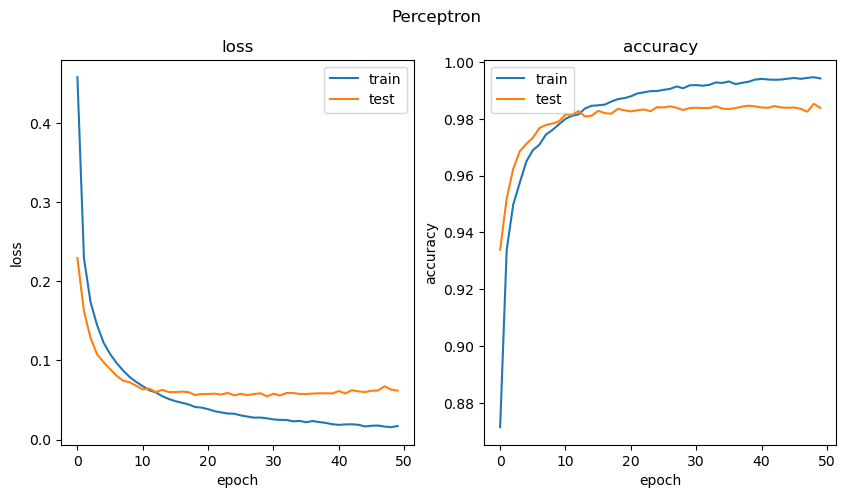

Running experiment DropConnectPerceptron with id d37ac7cc-baf3-4158-a15f-73e18e255718
Tensorboard logs are saved in logs/DropConnectPerceptron-d37ac7cc-baf3-4158-a15f-73e18e255718
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=256, bias=True, p=0.4, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=256, out_features=10, bias=True, p=0.4, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    ep

W0710 18:02:12.758000 140468126340160 torch/_dynamo/convert_frame.py:357] torch._dynamo hit config.cache_size_limit (8)
W0710 18:02:12.758000 140468126340160 torch/_dynamo/convert_frame.py:357]    function: 'drop_connect_inference' (/home/mr-racoon/DropConnect/drop-connect/model/dropconnect.py:21)
W0710 18:02:12.758000 140468126340160 torch/_dynamo/convert_frame.py:357]    last reason: L['p'] == 0.3                                               
W0710 18:02:12.758000 140468126340160 torch/_dynamo/convert_frame.py:357] To log all recompilation reasons, use TORCH_LOGS="recompiles".
W0710 18:02:12.758000 140468126340160 torch/_dynamo/convert_frame.py:357] To diagnose recompilation issues, see https://pytorch.org/docs/master/compile/troubleshooting.html.


Processed 157 batches, average loss: 0.3168, average accuracy: 0.9115, in epoch 1 for test mode
Processed 938 batches, average loss: 0.3129, average accuracy: 0.9102, in epoch 2 for train mode
Processed 157 batches, average loss: 0.2680, average accuracy: 0.9227, in epoch 2 for test mode
Processed 938 batches, average loss: 0.2673, average accuracy: 0.9218, in epoch 3 for train mode
Processed 157 batches, average loss: 0.2286, average accuracy: 0.9342, in epoch 3 for test mode
Processed 938 batches, average loss: 0.2360, average accuracy: 0.9318, in epoch 4 for train mode
Processed 157 batches, average loss: 0.2018, average accuracy: 0.9428, in epoch 4 for test mode
Processed 938 batches, average loss: 0.2067, average accuracy: 0.9402, in epoch 5 for train mode
Processed 157 batches, average loss: 0.1780, average accuracy: 0.9487, in epoch 5 for test mode
Processed 938 batches, average loss: 0.1853, average accuracy: 0.9463, in epoch 6 for train mode
Processed 157 batches, average loss

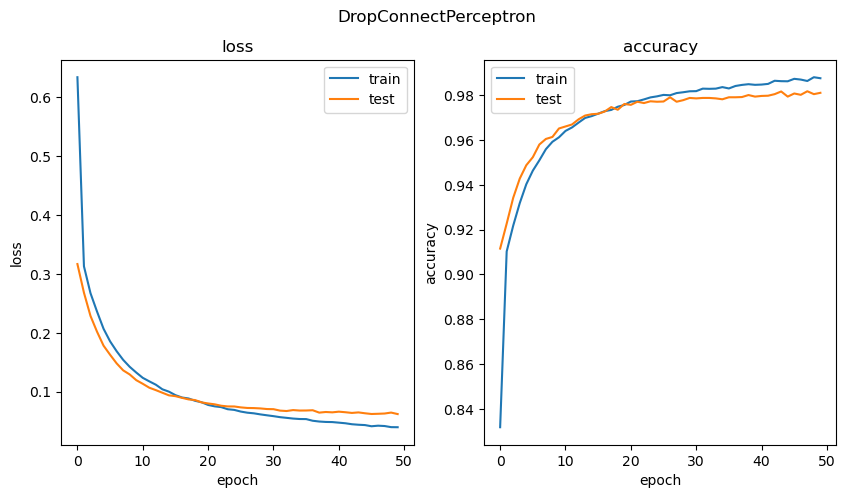

In [18]:
experiment = uuid4()
model = Perceptron(784, 256, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 256, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id 480b2d4f-51ed-4667-b987-9f7f833436c0
Tensorboard logs are saved in logs/Perceptron-480b2d4f-51ed-4667-b987-9f7f833436c0
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=256, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=256, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

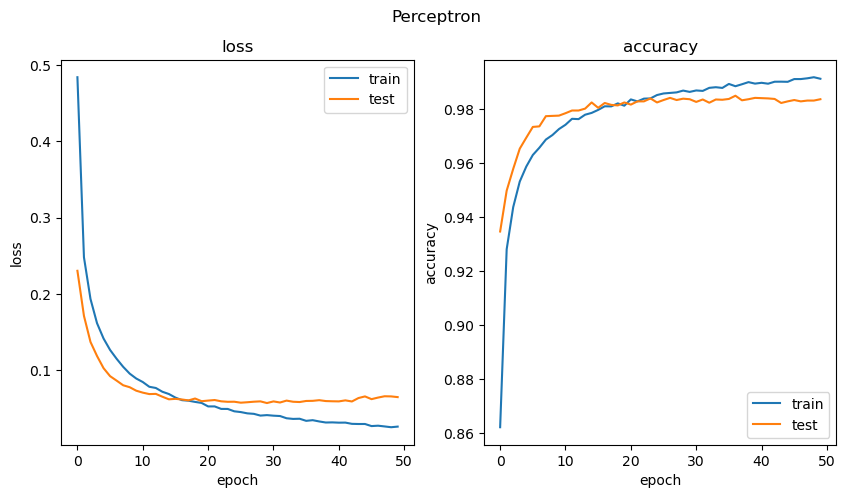

Running experiment DropConnectPerceptron with id 480b2d4f-51ed-4667-b987-9f7f833436c0
Tensorboard logs are saved in logs/DropConnectPerceptron-480b2d4f-51ed-4667-b987-9f7f833436c0
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=256, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=256, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    ep

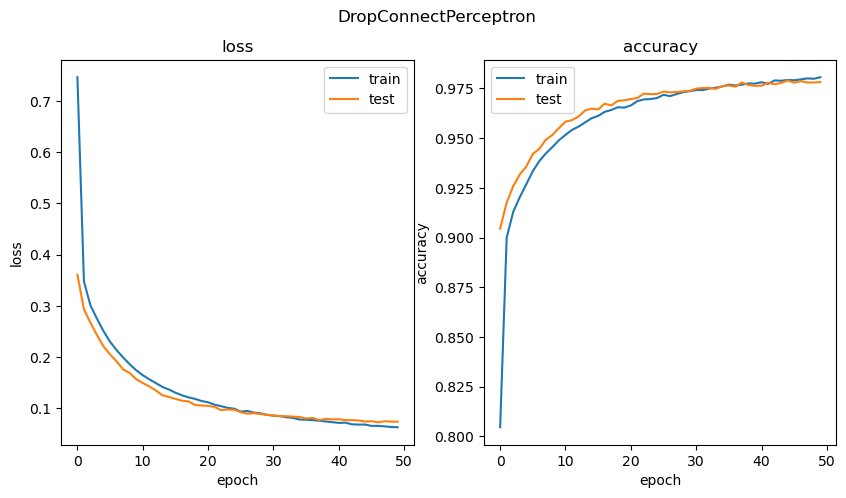

In [19]:
experiment = uuid4()
model = Perceptron(784, 256, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 256, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id e0fbb01e-dda1-4000-b9c4-c79c24257fda
Tensorboard logs are saved in logs/Perceptron-e0fbb01e-dda1-4000-b9c4-c79c24257fda
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntrop

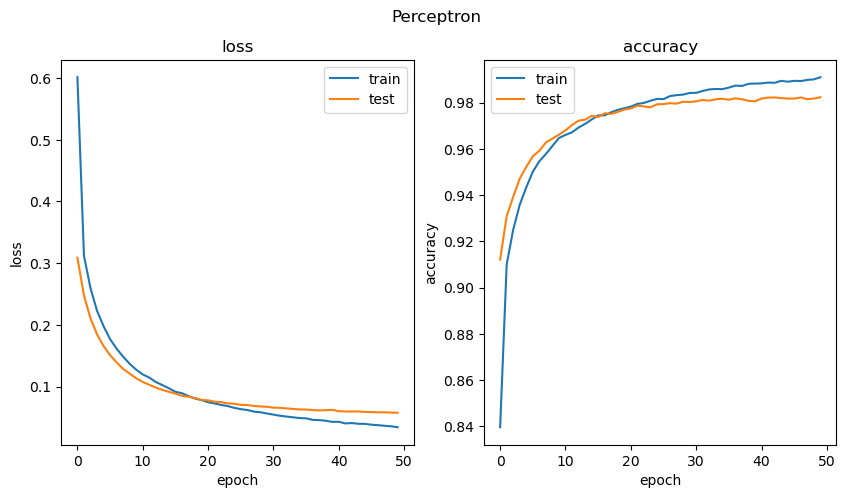

Running experiment DropConnectPerceptron with id e0fbb01e-dda1-4000-b9c4-c79c24257fda
Tensorboard logs are saved in logs/DropConnectPerceptron-e0fbb01e-dda1-4000-b9c4-c79c24257fda
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.3, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.3, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    max

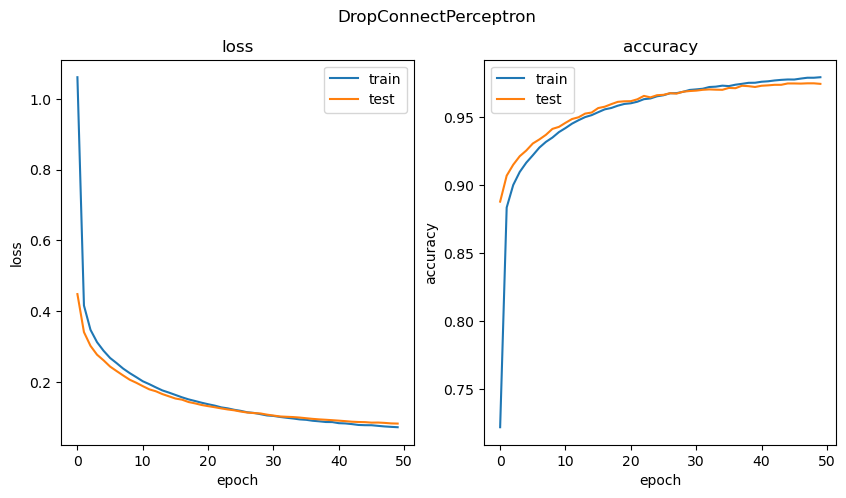

In [20]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.3).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.3).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id 9f4ae60a-eaad-4d11-a8cb-35a1625ab67c
Tensorboard logs are saved in logs/Perceptron-9f4ae60a-eaad-4d11-a8cb-35a1625ab67c
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.4, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntrop

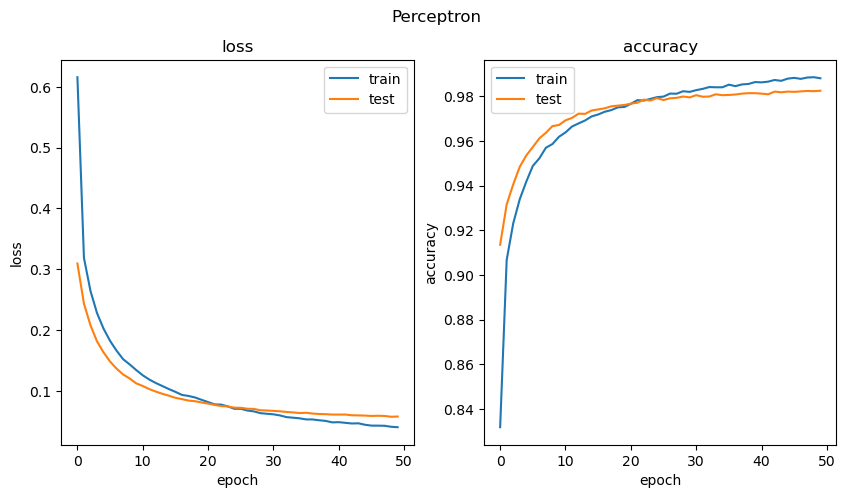

Running experiment DropConnectPerceptron with id 9f4ae60a-eaad-4d11-a8cb-35a1625ab67c
Tensorboard logs are saved in logs/DropConnectPerceptron-9f4ae60a-eaad-4d11-a8cb-35a1625ab67c
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.4, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.4, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    max

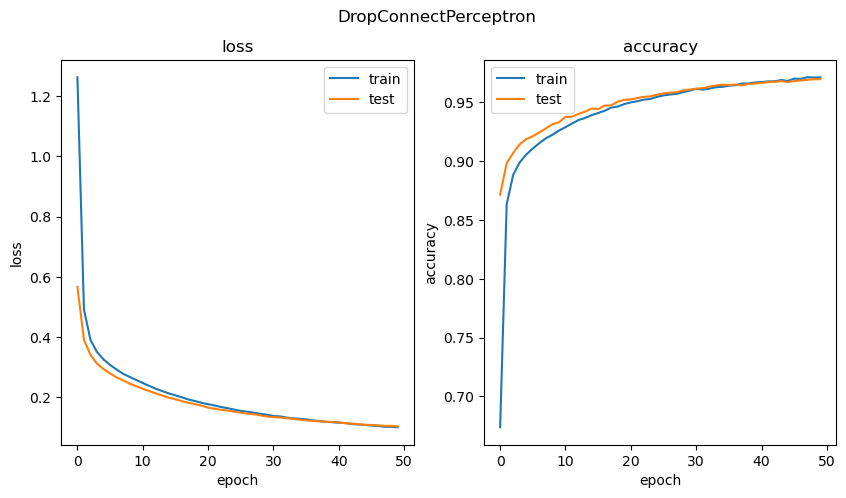

In [21]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.4).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.4).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id 5659e3db-7fae-427b-97ac-41a8f488608b
Tensorboard logs are saved in logs/Perceptron-5659e3db-7fae-427b-97ac-41a8f488608b
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntrop

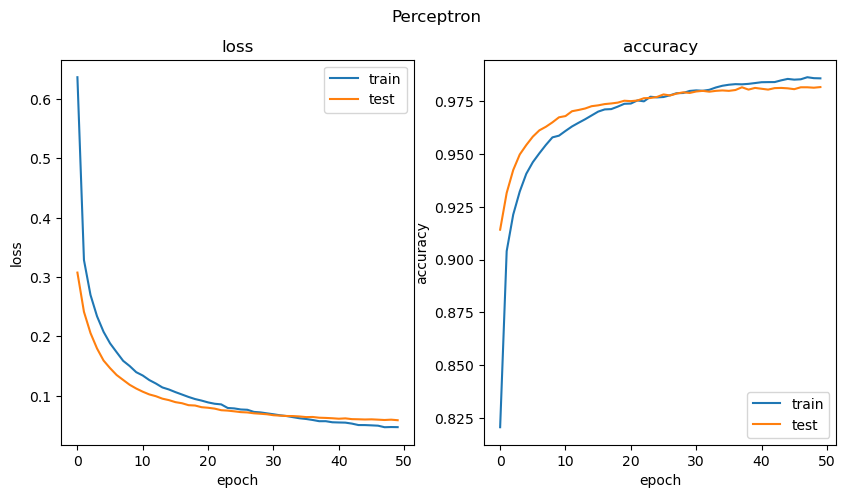

Running experiment DropConnectPerceptron with id 5659e3db-7fae-427b-97ac-41a8f488608b
Tensorboard logs are saved in logs/DropConnectPerceptron-5659e3db-7fae-427b-97ac-41a8f488608b
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    max

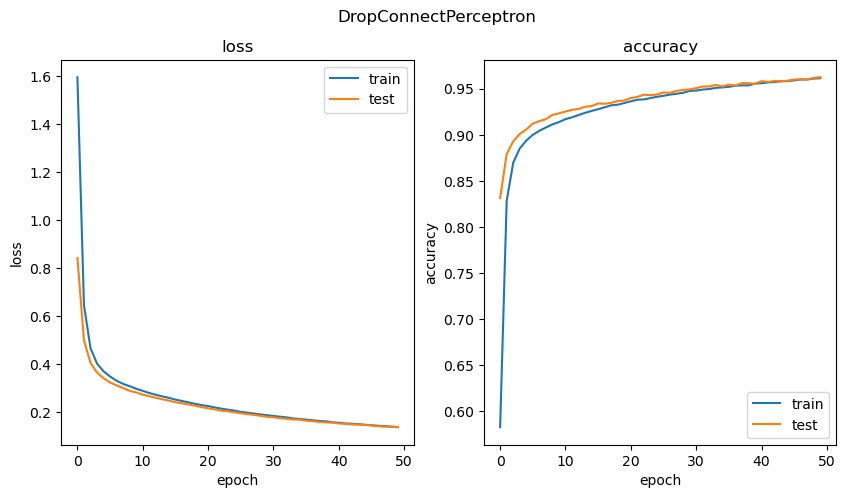

In [22]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id 64bef2ae-c94b-446d-ab6a-bbc4a03f82c3
Tensorboard logs are saved in logs/Perceptron-64bef2ae-c94b-446d-ab6a-bbc4a03f82c3
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=256, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=256, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntrop

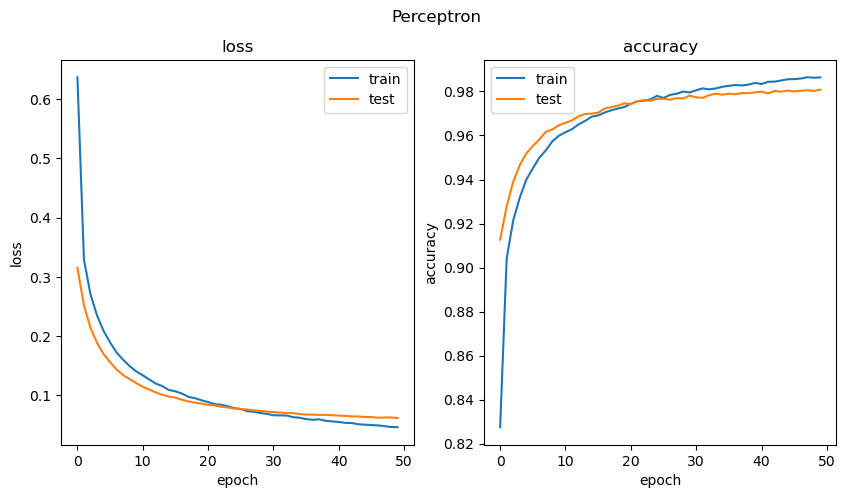

Running experiment DropConnectPerceptron with id 64bef2ae-c94b-446d-ab6a-bbc4a03f82c3
Tensorboard logs are saved in logs/DropConnectPerceptron-64bef2ae-c94b-446d-ab6a-bbc4a03f82c3
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=256, bias=True, p=0.3, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=256, out_features=10, bias=True, p=0.3, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    max

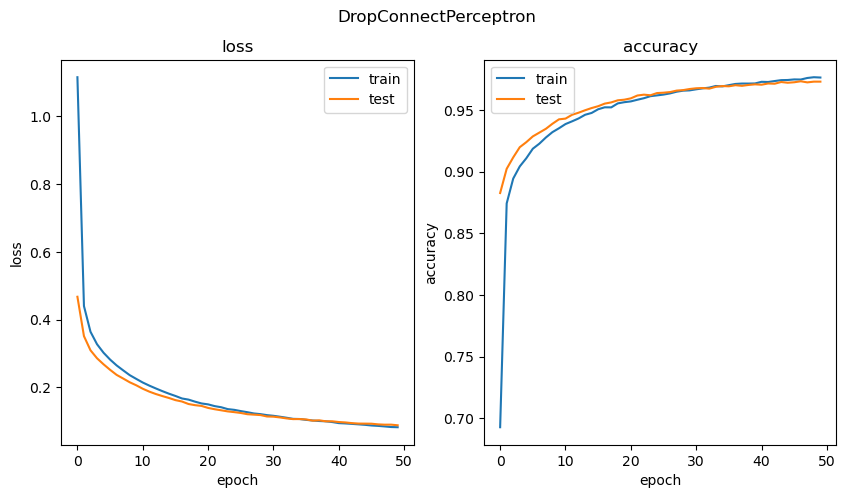

In [23]:
experiment = uuid4()
model = Perceptron(784, 256, 10, p=0.3).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 256, 10, p=0.3).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

In [ ]:
experiment = uuid4()
model = Perceptron(784, 256, 10, p=0.4).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

model = DropConnectPerceptron(784, 256, 10, p=0.4).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

Running experiment Perceptron with id 9489e5d2-72ba-4df1-980d-ad2f603f50c4
Tensorboard logs are saved in logs/Perceptron-9489e5d2-72ba-4df1-980d-ad2f603f50c4
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=256, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=256, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntrop

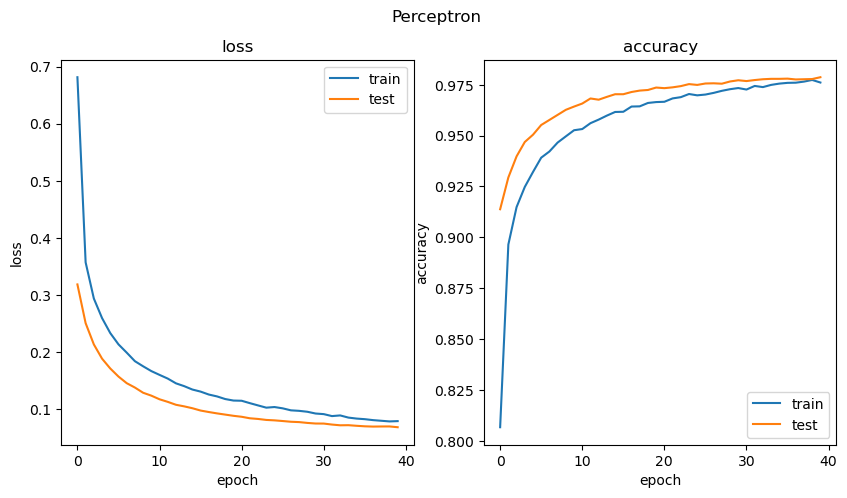

Running experiment DropConnectPerceptron with id 9489e5d2-72ba-4df1-980d-ad2f603f50c4
Tensorboard logs are saved in logs/DropConnectPerceptron-9489e5d2-72ba-4df1-980d-ad2f603f50c4
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=256, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=256, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    max

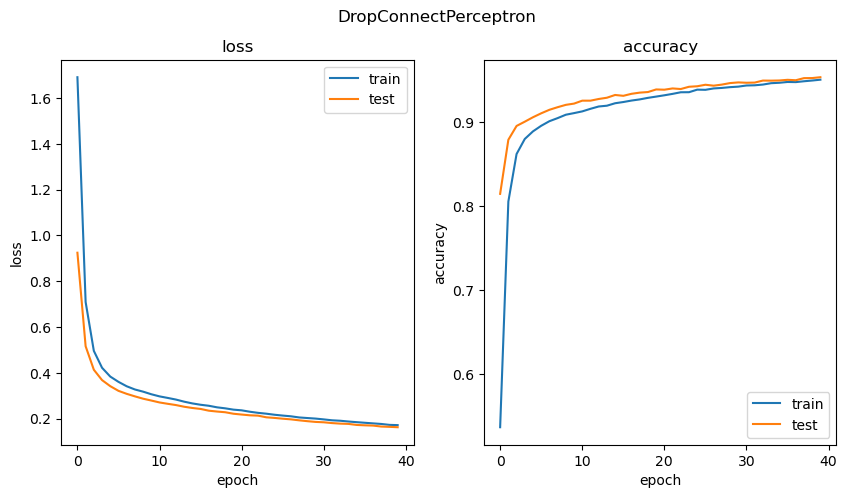

In [24]:
experiment = uuid4()
model = Perceptron(784, 256, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

model = DropConnectPerceptron(784, 256, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

Running experiment Perceptron16 with id 007a5890-2148-4628-8523-adc525096742
Tensorboard logs are saved in logs/Perceptron16-007a5890-2148-4628-8523-adc525096742
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
--------------------------------------------------------

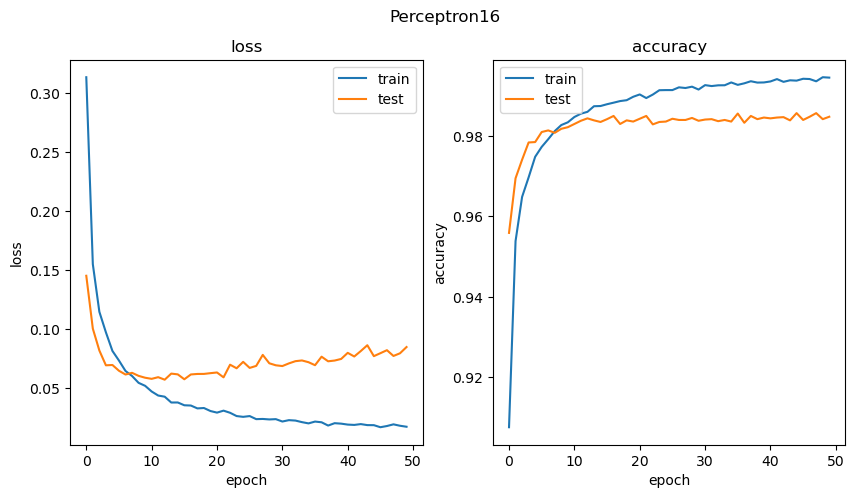

Running experiment DropConnectPerceptron16 with id 007a5890-2148-4628-8523-adc525096742
Tensorboard logs are saved in logs/DropConnectPerceptron16-007a5890-2148-4628-8523-adc525096742
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
  

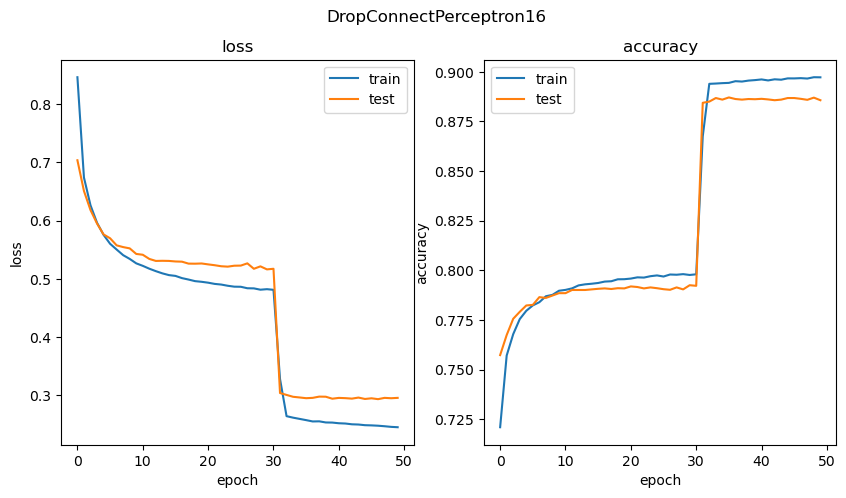

In [25]:
BATCH_SIZE = 16

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron32 with id d9182a21-521f-4e44-a5ed-c3d92c99c12d
Tensorboard logs are saved in logs/Perceptron32-d9182a21-521f-4e44-a5ed-c3d92c99c12d
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
--------------------------------------------------------

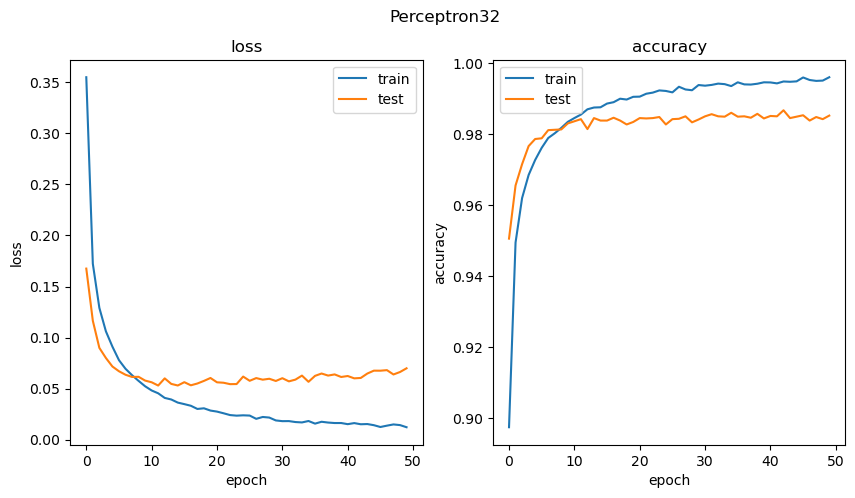

Running experiment DropConnectPerceptron32 with id d9182a21-521f-4e44-a5ed-c3d92c99c12d
Tensorboard logs are saved in logs/DropConnectPerceptron32-d9182a21-521f-4e44-a5ed-c3d92c99c12d
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
  

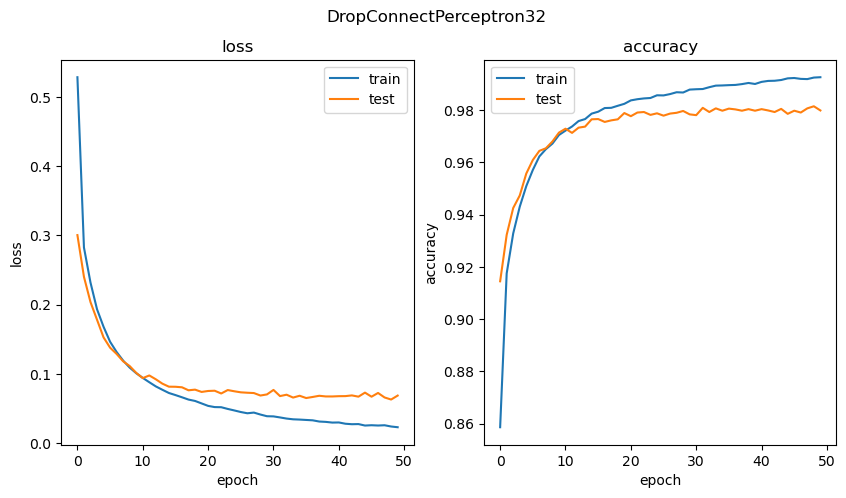

In [26]:
BATCH_SIZE = 32

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron64 with id efa67712-7039-44c8-90c3-986d1a339e7d
Tensorboard logs are saved in logs/Perceptron64-efa67712-7039-44c8-90c3-986d1a339e7d
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
--------------------------------------------------------

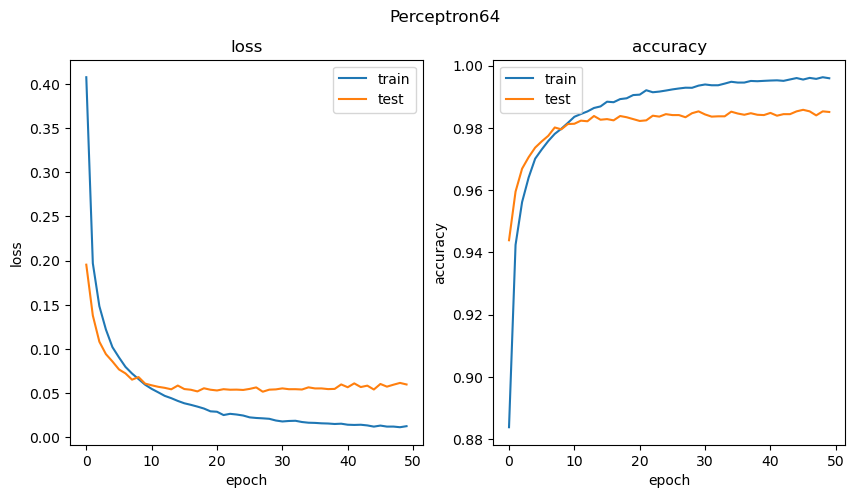

Running experiment DropConnectPerceptron64 with id efa67712-7039-44c8-90c3-986d1a339e7d
Tensorboard logs are saved in logs/DropConnectPerceptron64-efa67712-7039-44c8-90c3-986d1a339e7d
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
  

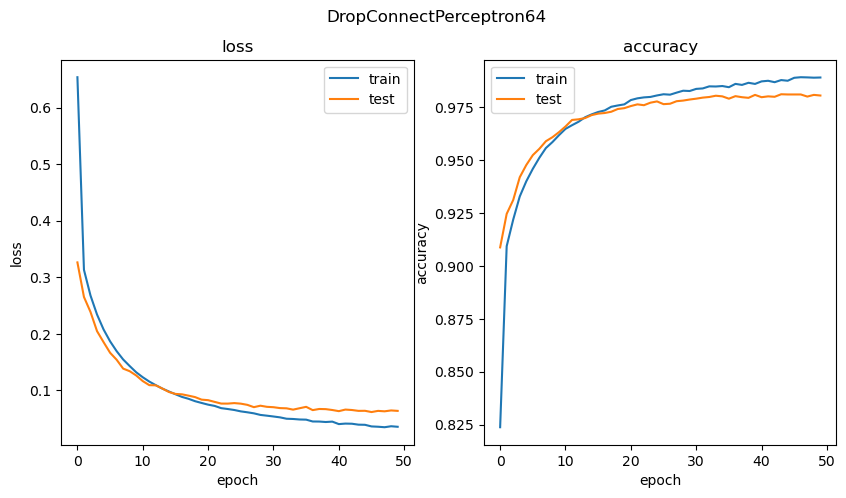

In [27]:
BATCH_SIZE = 64

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron128 with id 46157115-7c55-4b17-8110-80e5339fe9c0
Tensorboard logs are saved in logs/Perceptron128-46157115-7c55-4b17-8110-80e5339fe9c0
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
------------------------------------------------------

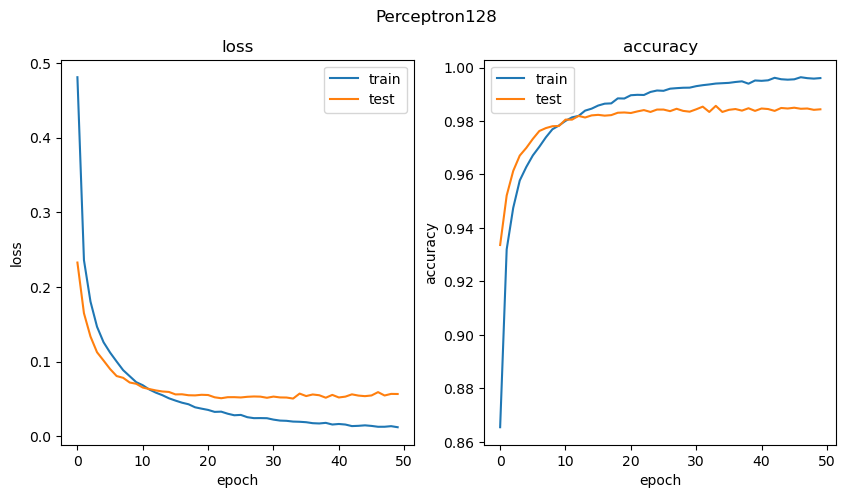

Running experiment DropConnectPerceptron128 with id 46157115-7c55-4b17-8110-80e5339fe9c0
Tensorboard logs are saved in logs/DropConnectPerceptron128-46157115-7c55-4b17-8110-80e5339fe9c0
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False


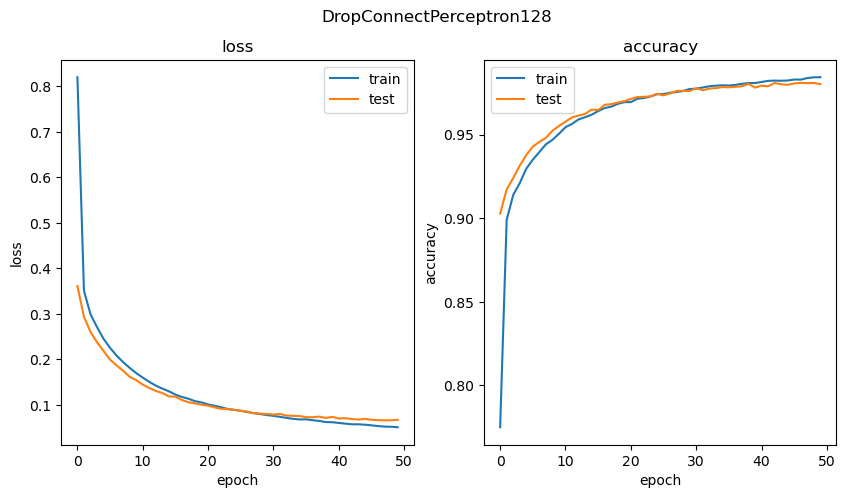

In [28]:
BATCH_SIZE = 128

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron256 with id 9e2812c3-1911-4e20-889d-bb0db12bab4b
Tensorboard logs are saved in logs/Perceptron256-9e2812c3-1911-4e20-889d-bb0db12bab4b
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
------------------------------------------------------

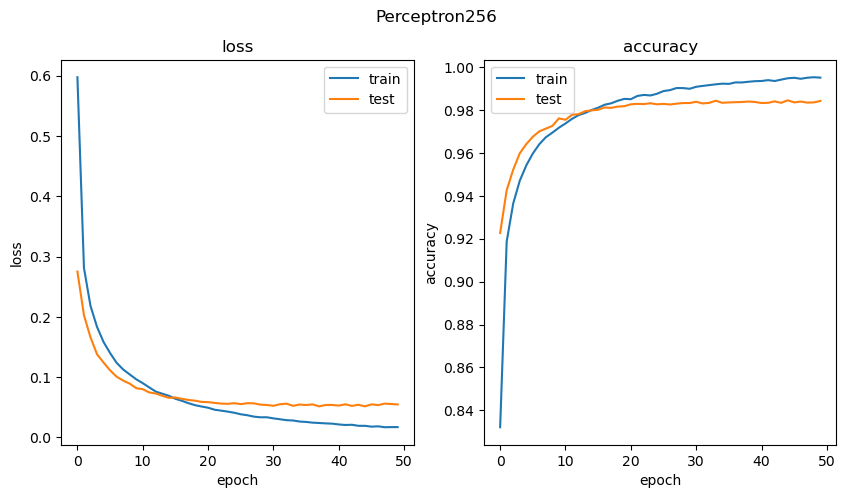

Running experiment DropConnectPerceptron256 with id 9e2812c3-1911-4e20-889d-bb0db12bab4b
Tensorboard logs are saved in logs/DropConnectPerceptron256-9e2812c3-1911-4e20-889d-bb0db12bab4b
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False


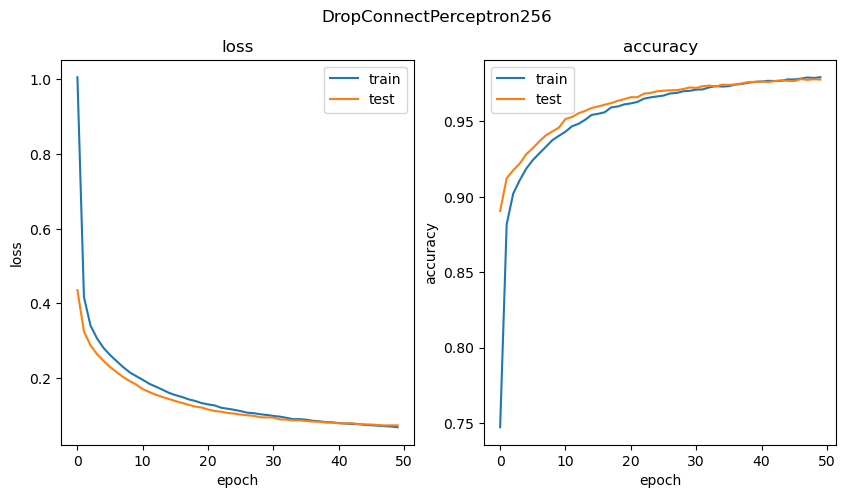

In [29]:
BATCH_SIZE = 256

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron32 with id 19310307-1a9c-42a3-ab78-02b53cfc1215
Tensorboard logs are saved in logs/Perceptron32-19310307-1a9c-42a3-ab78-02b53cfc1215
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
--------------------------------------------------------

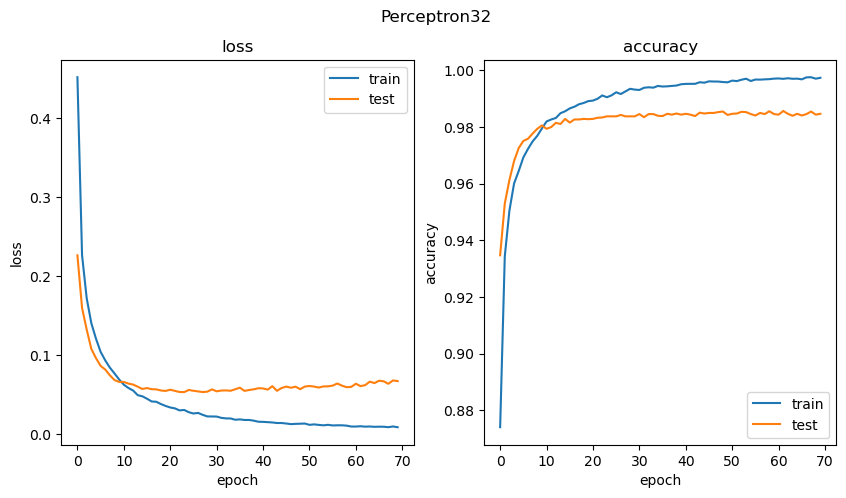

Running experiment DropConnectPerceptron32 with id 19310307-1a9c-42a3-ab78-02b53cfc1215
Tensorboard logs are saved in logs/DropConnectPerceptron32-19310307-1a9c-42a3-ab78-02b53cfc1215
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
  

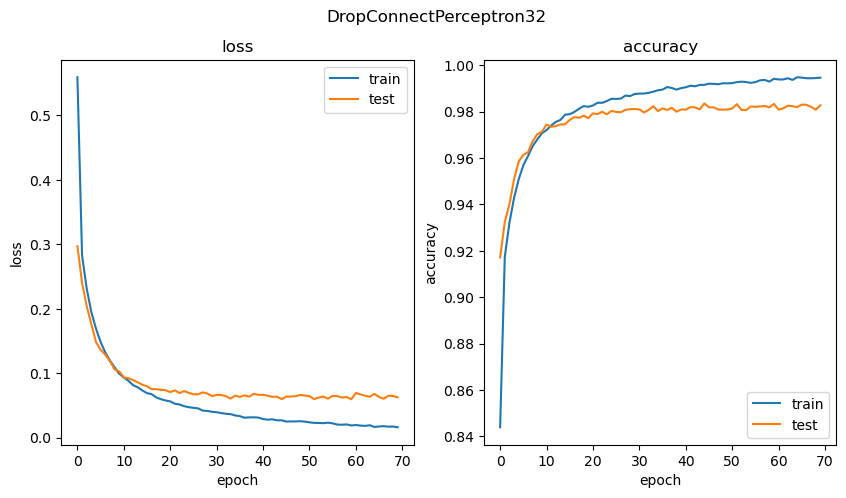

In [30]:
BATCH_SIZE = 32

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

Running experiment Perceptron64 with id c1c6e08b-50eb-4f10-8f47-5dae756c692e
Tensorboard logs are saved in logs/Perceptron64-c1c6e08b-50eb-4f10-8f47-5dae756c692e
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
--------------------------------------------------------

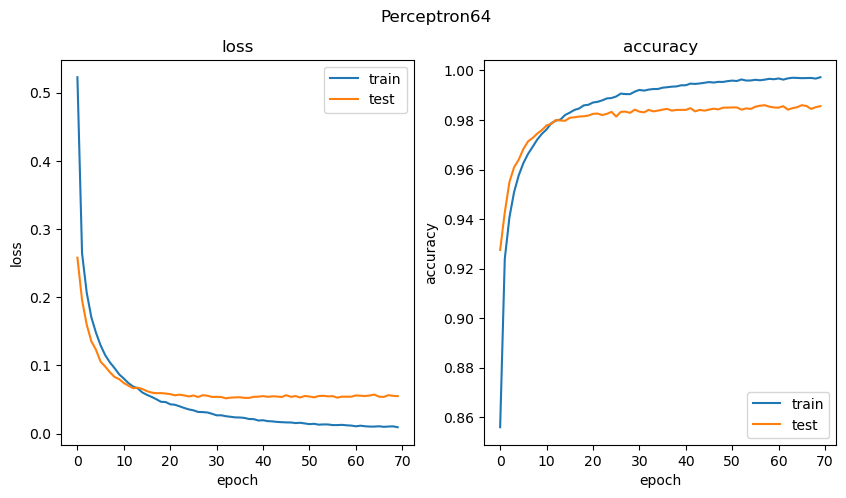

Running experiment DropConnectPerceptron64 with id c1c6e08b-50eb-4f10-8f47-5dae756c692e
Tensorboard logs are saved in logs/DropConnectPerceptron64-c1c6e08b-50eb-4f10-8f47-5dae756c692e
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
  

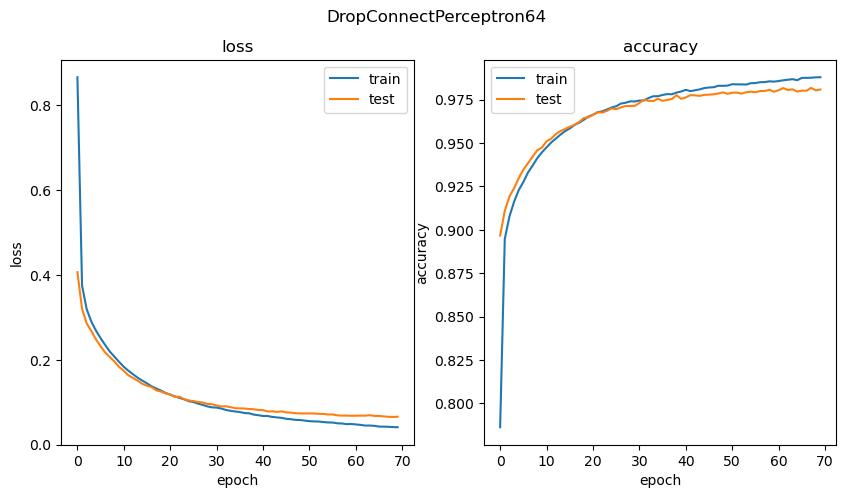

In [31]:
BATCH_SIZE = 64

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

Running experiment Perceptron128 with id 99aab918-0ad7-4cc5-9250-6b3493449b35
Tensorboard logs are saved in logs/Perceptron128-99aab918-0ad7-4cc5-9250-6b3493449b35
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
------------------------------------------------------

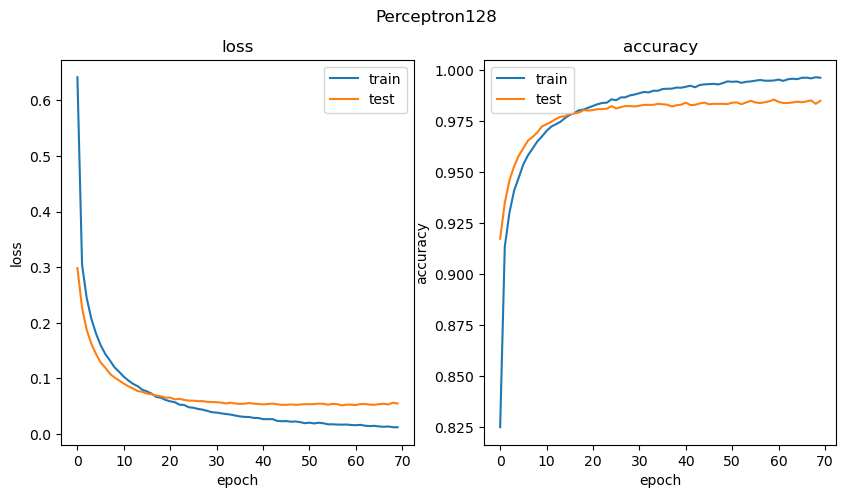

Running experiment DropConnectPerceptron128 with id 99aab918-0ad7-4cc5-9250-6b3493449b35
Tensorboard logs are saved in logs/DropConnectPerceptron128-99aab918-0ad7-4cc5-9250-6b3493449b35
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False


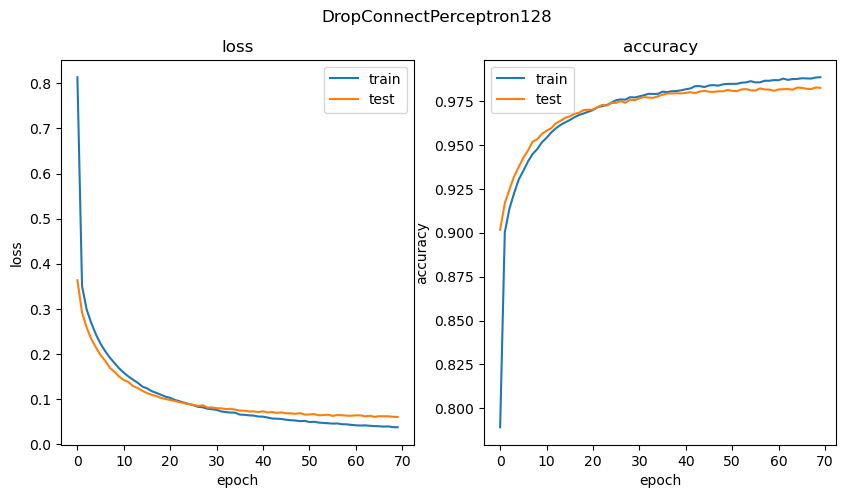

In [32]:
BATCH_SIZE = 128

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

Running experiment Perceptron256 with id 1edcf08f-7214-4696-b418-4515e3b16272
Tensorboard logs are saved in logs/Perceptron256-1edcf08f-7214-4696-b418-4515e3b16272
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
------------------------------------------------------

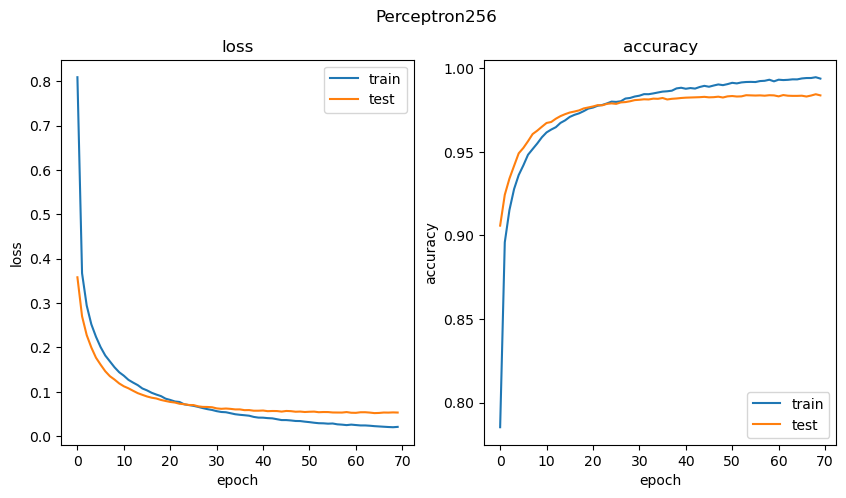

Running experiment DropConnectPerceptron256 with id 1edcf08f-7214-4696-b418-4515e3b16272
Tensorboard logs are saved in logs/DropConnectPerceptron256-1edcf08f-7214-4696-b418-4515e3b16272
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False


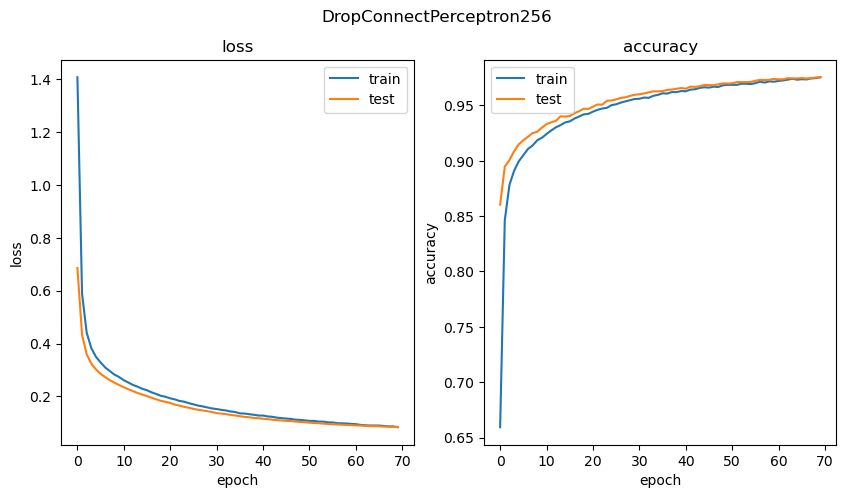

In [33]:
BATCH_SIZE = 256

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)